In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
def read_file(file_path):
    return pd.read_csv(file_path, sep='\t')

train_file = './data/orange_small_train.data'
test_file = './data/orange_small_test.data'

df_train = read_file(train_file)
df_test = read_file(test_file)

print('df_train: ', df_train.shape)
print('df_test: ', df_test.shape)

df_train:  (50000, 230)
df_test:  (50000, 230)


In [3]:
def read_label_file(file_path):
    df = pd.read_csv(file_path, header=-1)[0] == 1
    return df.values

appetency_label_file = './data/orange_small_train_appetency.labels'
churn_label_file = './data/orange_small_train_churn.labels'
upselling_label_file = './data/orange_small_train_upselling.labels'

Y_appetency = read_label_file(appetency_label_file)
Y_churn = read_label_file(churn_label_file)
Y_upselling = read_label_file(upselling_label_file)

dict_Y = {}
dict_Y['Y_appetency'] = Y_appetency
dict_Y['Y_churn'] = Y_churn
dict_Y['Y_upselling'] = Y_upselling

print('Y_appetency: ', Y_appetency.size)
print('Y_churn: ', Y_churn.size)
print('Y_upselling: ', Y_upselling.size)

Y_appetency:  50000
Y_churn:  50000
Y_upselling:  50000


In [4]:
df_train.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


Muitas colunas vazias (tudo NaN), podemos retirá-las.

In [5]:
print(df_train.shape)
print(df_test.shape)
df_train.dropna(axis='columns', how='all', inplace=True)
df_test.dropna(axis='columns', how='all', inplace=True)
print(df_train.shape)
print(df_test.shape)

(50000, 230)
(50000, 230)
(50000, 212)
(50000, 212)


In [6]:
print(df_train.shape)
print(df_test.shape)
# retirar linhas que só tem na
df_train.dropna(axis='rows', how='all', inplace=True)
df_test.dropna(axis='rows', how='all', inplace=True)
print(df_train.shape)
print(df_test.shape)

(50000, 212)
(50000, 212)
(50000, 212)
(50000, 212)


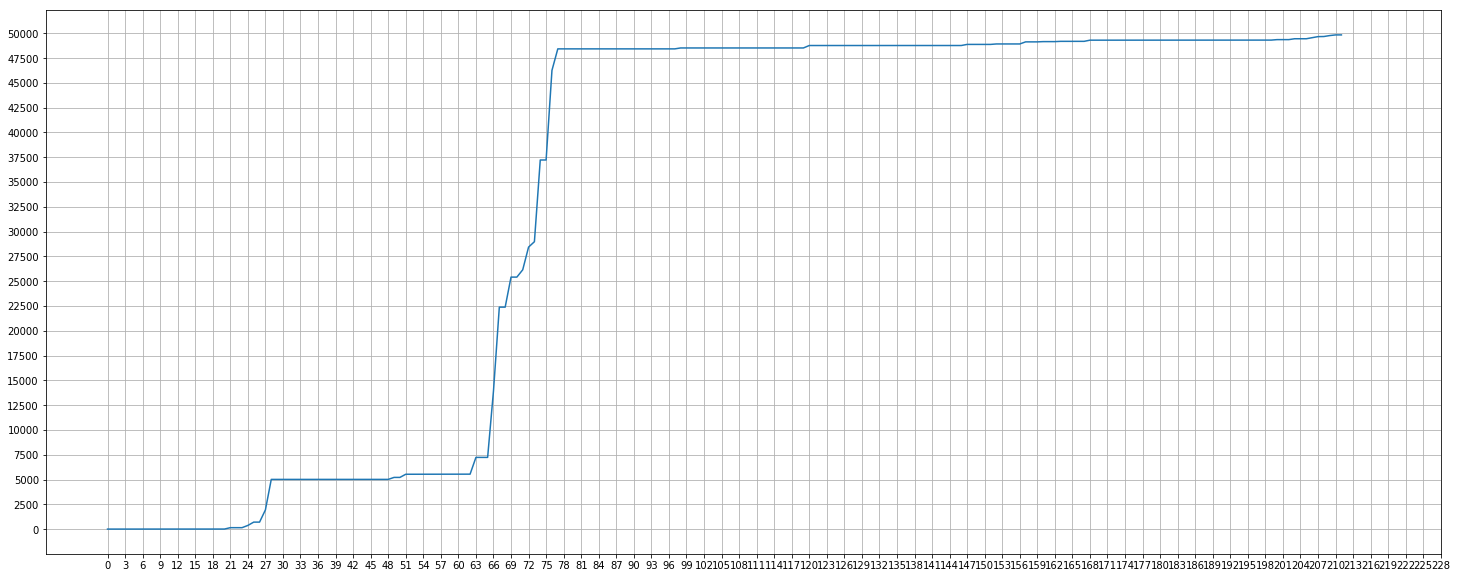

In [7]:
def plotar_grafico_analise_colunas_nan(df):
    graf_data = df.isnull().sum(axis='rows').sort_values().tolist()

    plt.rcParams["figure.figsize"] = [25,10]
    plt.grid(True)
    plt.plot(graf_data)
    plt.xticks(np.arange(0, 231, 3))
    plt.yticks(np.arange(0, 50001, 2500))    
    plt.show()
    
plotar_grafico_analise_colunas_nan(df_train)
#plotar_grafico_analise_colunas_nan(df_test)

Mais da metade das features possuem +47500 valores nulos

In [8]:
max_nan_por_col = 37500

print('Shape original train: ', df_train.shape)
print('Shape original test: ', df_test.shape)

df_train_count_nan = (df_train.isnull().sum(axis='rows') > max_nan_por_col)
print('Colunas a serem removidas: ', df_train_count_nan.sum())

df_train_count_nan_dict = df_train_count_nan.to_dict()
columns_to_drop = [o for o in df_train_count_nan_dict if df_train_count_nan_dict[o] is True]

df_train_colunas_filtradas = df_train.drop(columns_to_drop, axis='columns')
df_test_colunas_filtradas = df_test.drop(columns_to_drop, axis='columns')

print('Shape após remoção train: ', df_train_colunas_filtradas.shape)
print('Shape após remoção test: ', df_test_colunas_filtradas.shape)

Shape original train:  (50000, 212)
Shape original test:  (50000, 212)
Colunas a serem removidas:  136
Shape após remoção train:  (50000, 76)
Shape após remoção test:  (50000, 76)


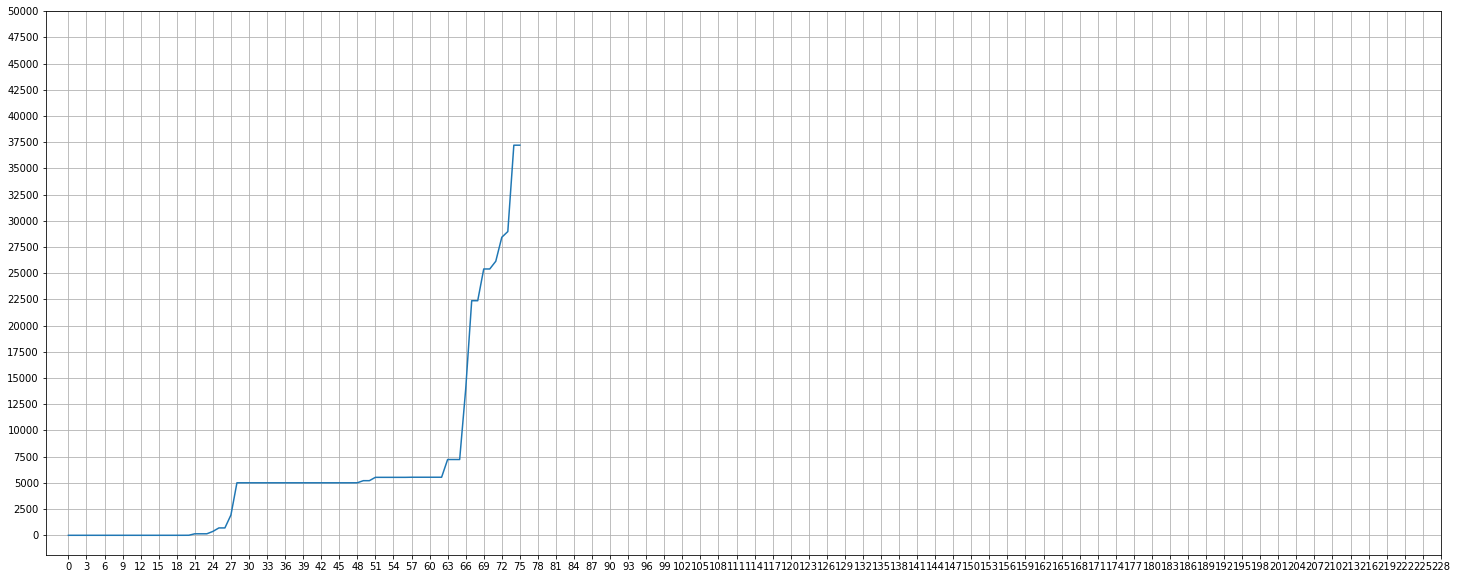

In [9]:
plotar_grafico_analise_colunas_nan(df_train_colunas_filtradas)
#plotar_grafico_analise_colunas_nan(df_test_colunas_filtradas)

71518


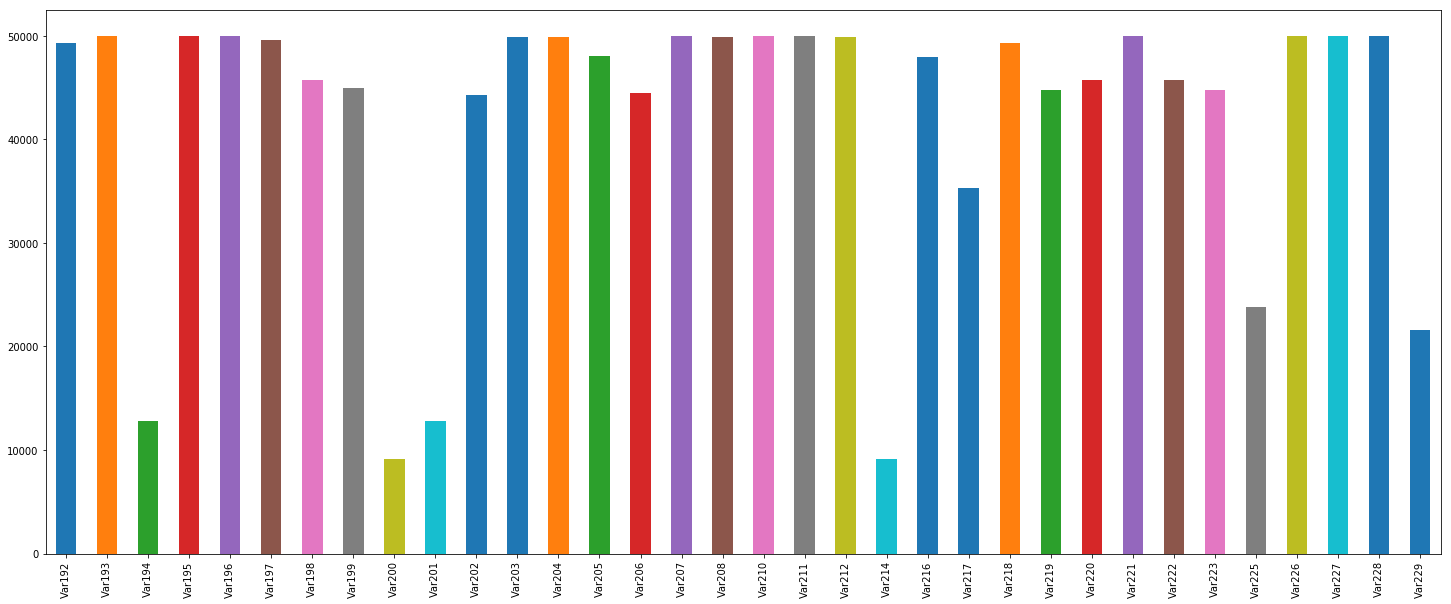

In [10]:
df_train_colunas_filtradas_object = df_train_colunas_filtradas.select_dtypes(include=['object'])
df_test_colunas_filtradas_object = df_train_colunas_filtradas.select_dtypes(include=['object'])

s = df_train_colunas_filtradas_object.agg(lambda x: len(x.dropna()) - len(x.unique()) )

s_unique = df_train_colunas_filtradas_object.agg(lambda x: len(x.unique()) )
print(s_unique.sum())

s.plot(kind="bar")

In [11]:
names = list(df_train_colunas_filtradas_object.columns.values)
temp_df_train = pd.concat([df_train_colunas_filtradas_object],axis=0)
temp_df_test = pd.concat([df_test_colunas_filtradas_object],axis=0)

for i in names:
    temp_df_train[i] = temp_df_train[i].fillna('MISSING')
    temp_df_train.loc[temp_df_train[i].value_counts()[temp_df_train[i]].values < 100, i] = "RARE_VALUE"
    
    temp_df_test[i] = temp_df_test[i].fillna('MISSING')
    temp_df_test.loc[temp_df_test[i].value_counts()[temp_df_test[i]].values < 100, i] = "RARE_VALUE"


#temp_df.loc[temp_df[i].value_counts()[temp_df[i]].values < 100, i] = "RARE_VALUE"
#temp_df[i].value_counts()

925


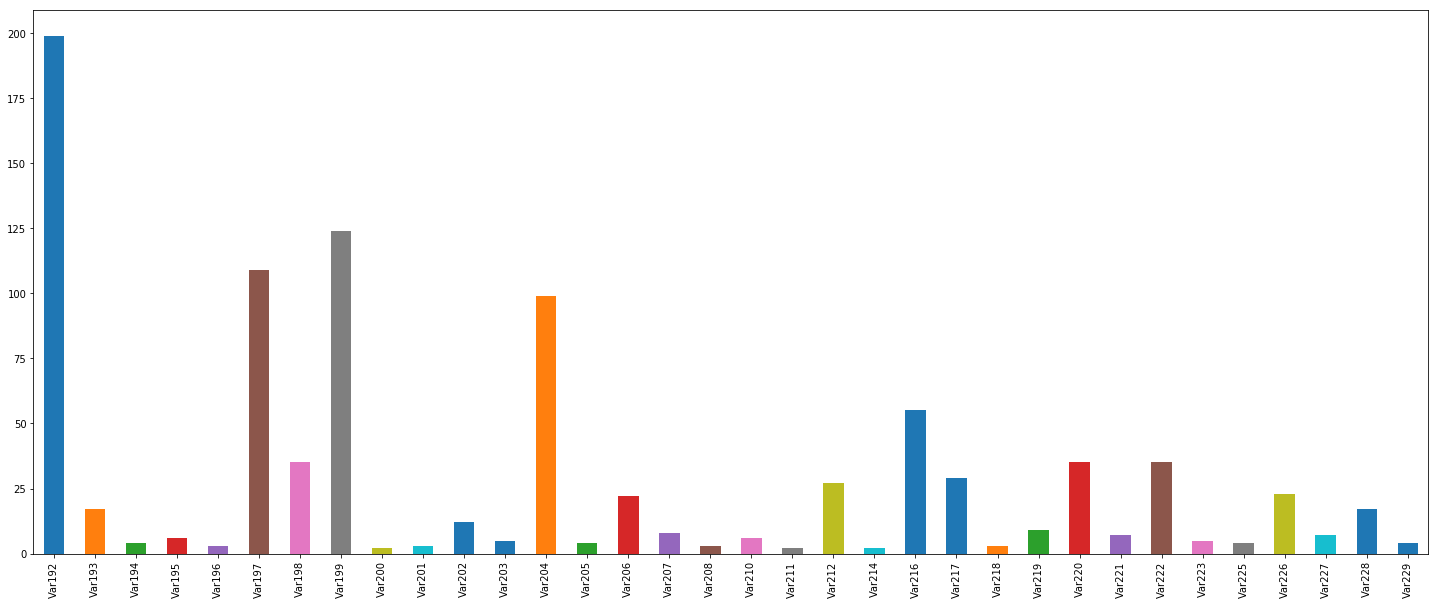

In [12]:
# verificar qtde de valores unicos por feature e geral
s = temp_df_train.agg(lambda x: len(x.unique()) )
#s = temp_df_test.agg(lambda x: len(x.unique()) )

print(s.sum())
s.plot(kind="bar")

In [13]:
# fillna de valores numericos com a media
df_train_colunas_filtradas_not_obj = df_train_colunas_filtradas.select_dtypes(exclude=['object'])
df_test_colunas_filtradas_not_obj = df_test_colunas_filtradas.select_dtypes(exclude=['object'])

df_train_filled = df_train_colunas_filtradas_not_obj.groupby(df_train_colunas_filtradas_not_obj.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
df_test_filled = df_test_colunas_filtradas_not_obj.groupby(df_test_colunas_filtradas_not_obj.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

# por algum motivo o fillna não está sendo aplicado na coluna Var109
df_train_filled['Var109'] = df_train_filled['Var109'].fillna(df_train_filled['Var109'].mean())
df_test_filled['Var109'] = df_test_filled['Var109'].fillna(df_test_filled['Var109'].mean())

In [14]:
# normalização dos valores numericos
normalizer = preprocessing.Normalizer().fit(df_train_filled)

X_train_normalized = normalizer.transform(df_train_filled)
df_train_filled.loc[:,:] = X_train_normalized

X_test_normalized = normalizer.transform(df_test_filled)
df_test_filled.loc[:,:] = X_test_normalized

In [15]:
# gerar dummies das colunas categoricas
temp_df_train_dummies = pd.get_dummies( temp_df_train )
temp_df_test_dummies = pd.get_dummies( temp_df_test )

# juntar com os valores numericos
temp_df_train_concat = pd.concat([df_train_filled, temp_df_train_dummies], axis=1)
temp_df_test_concat = pd.concat([df_test_filled, temp_df_test_dummies], axis=1)

print(temp_df_train_concat.shape)
print(temp_df_test_concat.shape)

temp_df_train_concat.head()
#temp_df_test_concat.head()

(50000, 967)
(50000, 967)


,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228_WfJYmPMksSqa1pajvfG,Var228_Zy3gnGM,Var228_am14IcfM7tWLrUmRT52KtA,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_xwM2aC7IdeMC0,Var229_MISSING,Var229_RARE_VALUE,Var229_am7c,Var229_mj86
0,0.000587,2.690928e-06,0.000071,0.000178,0.000223,5.381855e-06,0.000049,0.000064,0.0,0.001372,...,0,0,0,0,0,0,1,0,0,0
1,0.000042,0.000000e+00,0.000000,0.000013,0.000017,1.593841e-07,0.000002,0.000028,0.0,0.379730,...,0,0,0,0,0,0,1,0,0,0
2,0.000432,5.781045e-07,0.000075,0.000100,0.000125,2.147245e-06,0.000067,0.000018,0.0,0.485929,...,0,0,0,1,0,0,0,0,1,0
3,0.003098,0.000000e+00,0.000000,0.000548,0.000000,1.052760e-05,0.000000,0.000052,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,0.000964,6.557749e-06,0.003013,0.000060,0.000075,3.747285e-06,0.000060,0.000187,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def preparar_y(y):

    temp_df_train_concat[y] = dict_Y[y]

    train_train, train_test = train_test_split(temp_df_train_concat, test_size=0.3)

    temp_df_train_concat.drop(y, axis=1, inplace=True)
    
    # separacao das features e target
    train_X = train_train.drop(y, axis=1)
    train_y = train_train[y]
    test_X = train_test.drop(y, axis=1)
    test_y = train_test[y]
    
    return train_X, train_y, test_X, test_y

    
# Y_appetency
# Y_churn
# Y_upselling
train_X, train_y, test_X, test_y = preparar_y('Y_churn')

In [17]:
# decision tree
tree = DecisionTreeClassifier(max_depth=8, random_state=2)
tree = tree.fit(train_X, train_y)
pred = tree.predict(test_X)

In [18]:
from sklearn import datasets, linear_model
# linear regression

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X, train_y)

# Make predictions using the testing set
pred = regr.predict(test_X)

pred = (pd.DataFrame(pred)[0] > 0)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid('off')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 1651 12211]
 [   57  1081]]
Normalized confusion matrix
[[0.12 0.88]
 [0.05 0.95]]


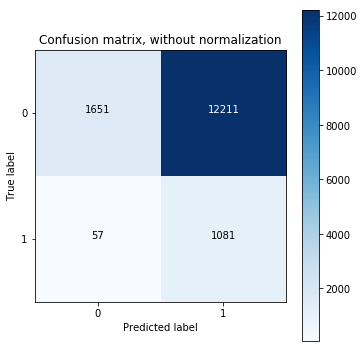

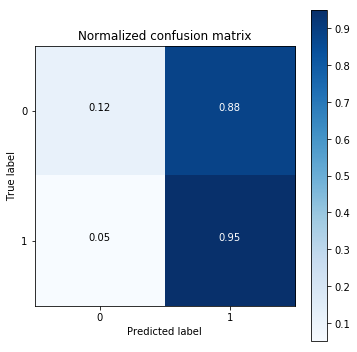

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

class_names = [0,1]

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = [5,5]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [21]:
from sklearn import metrics
metrics.roc_auc_score(test_y, pred)

0.5345073545688495

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = linear_model.LinearRegression()

scores = cross_val_score(clf, train_X, train_y, cv=5, scoring='roc_auc')
scores

array([0.64, 0.66, 0.66, 0.66, 0.66])

In [23]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


def models_comparsion(y_def):

    train_y_def = y_def
    
    # Test options and evaluation metric
    seed = 8
    scoring = 'roc_auc'

    # Spot Check Algorithms
    models = []
    models.append(('LoR', LogisticRegression()))
    models.append(('LiR', LinearRegression()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    #models.append(('KNN', KNeighborsClassifier())) # 0.54
    #models.append(('CART', DecisionTreeClassifier())) # 0.51
    #models.append(('NB', GaussianNB())) # 0.55

    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, train_X, train_y_def, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)



    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [28]:
train_X, train_y, test_X, test_y = preparar_y('Y_churn')
#models_comparsion(train_y)

In [25]:
train_X, train_y, test_X, test_y = preparar_y('Y_appetency')
#models_comparsion(train_y)

In [26]:
train_X, train_y, test_X, test_y = preparar_y('Y_upselling')
#models_comparsion(train_y)

In [29]:
LogisticRegression()

# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(train_X, train_y)

# Make predictions using the testing set
pred = regr.predict(test_X)

#pred = (pd.DataFrame(pred)[0] > 0)
pred = pd.DataFrame(pred)

pred[0].value_counts()

False    14965
True        35
Name: 0, dtype: int64

In [31]:
train_X, train_y, test_X, test_y = preparar_y('Y_churn')
clf = linear_model.LogisticRegression()
clf.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
pred = clf.predict(temp_df_test_concat)
np.savetxt('out.txt', pred, fmt='%d')